In [1]:
import numpy as np 
import matplotlib.pyplot as plt
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

In [2]:
def grad_rosenbrock(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

In [36]:
def optimizer(optimizer_name, start_pos, lr, epochs, **kwargs):
    x, y = start_pos
    path = [(x, y)]
    v = np.zeros(2)

    for  i in range(1, epochs + 1):
        grad = grad_rosenbrock(x, y)

        if optimizer_name == 'SGD':
            update = -lr * grad 
        elif optimizer_name == 'Momentum':
            beta = kwargs.get('beta')
            v = beta * v + grad
            update = -lr * v
            

        x += update[0]
        y += update[1]
        path.append((x,y))
    return np.array(path)

In [37]:
x_range = np.linspace(-2, 2, 300)
y_range = np.linspace(-1, 3, 250)ㄹ

In [52]:
x_range.shape

(300,)

In [53]:
y_range.shape

(250,)

In [38]:
np.meshgrid(x_range, y_range).__len__()

2

### 바나나 함수 구성

In [39]:
X, y = np.meshgrid(x_range, y_range)

In [40]:
X.shape

(250, 300)

In [41]:
y.shape

(250, 300)

In [42]:
z = rosenbrock(X, y)

In [43]:
z

array([[2509.        , 2455.87161272, 2403.66277426, ..., 2395.76979767,
        2447.92512443, 2501.        ],
       [2492.96154901, 2440.00451189, 2387.96587359, ..., 2380.072897  ,
        2432.05802359, 2484.96154901],
       [2476.97471009, 2424.18902312, 2372.32058498, ..., 2364.42760839,
        2416.24253483, 2468.97471009],
       ...,
       [ 115.52892695,  104.72402877,   94.55462915, ...,   86.66165256,
          96.77754048,  107.52892695],
       [ 112.23865744,  101.60510942,   91.60590996, ...,   83.71293337,
          93.65862113,  104.23865744],
       [ 109.        ,   98.53780214,   88.70880283, ...,   80.81582624,
          90.59131384,  101.        ]], shape=(250, 300))

### sgd 실행

In [47]:
start_pos = (-1.5, 1.5)
lr = 0.0005
epochs = 2000
result = optimizer('SGD', start_pos, lr, epochs=epochs)

In [48]:
result.shape

(2001, 2)

In [49]:
start_pos = (-1.5, 1.5)
lr = 0.0002
epochs = 2000
momentum = optimizer('Momentum', start_pos, lr, epochs, beta=0.9)

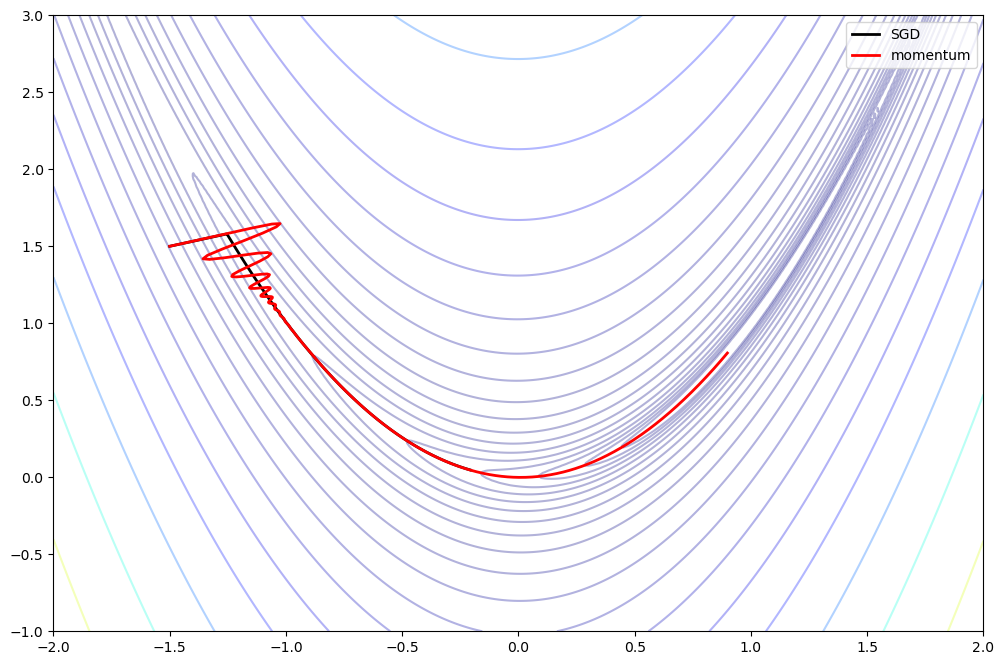

In [50]:
plt.figure(figsize=(12, 8))
plt.contour(X,y, z, levels=np.logspace(-0.5, 3.5, 20), cmap='jet', alpha=0.3)
plt.plot(result[:, 0], result[:, 1], color='black', linewidth=2, label='SGD')
plt.plot(momentum[:, 0], momentum[:, 1], color='red', linewidth=2, label='momentum')
plt.legend()
plt.show()